In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [3]:
series = pd.Series(["BMW ", "Toyota", "Honda"])
colours = pd.Series(["Red", "Blue", "White"])

In [4]:
series

0      BMW 
1    Toyota
2     Honda
dtype: object

In [5]:
car_data = pd.DataFrame({"Car make" : series, "Colours": colours})
car_data

,Car make,Colours
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [6]:
csv = pd.read_csv("/content/drive/MyDrive/CSV/1_county_level_confirmed_cases.csv")
#csv #to print all of column
csv

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2021-03-14 16:25:11 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,6426,11641.30,95,172.10
1,2021-03-14 16:25:11 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,20103,9659.93,294,141.27
2,2021-03-14 16:25:11 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,2184,8471.03,53,205.57
3,2021-03-14 16:25:11 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,2481,11013.45,58,257.47
4,2021-03-14 16:25:11 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,6291,10913.35,129,223.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,2021-03-14 16:25:11 UTC,special_exception,Utah,Central Utah,"Central Utah, Utah, US",NaN,39.372319,-111.575868,NaN,NaN,8506,NaN,56,NaN
3265,2021-03-14 16:25:11 UTC,special_exception,Utah,Southeast Utah,"Southeast Utah, Utah, US",NaN,38.996171,-110.701396,NaN,NaN,3099,NaN,23,NaN
3266,2021-03-14 16:25:11 UTC,special_exception,Utah,Southwest Utah,"Southwest Utah, Utah, US",NaN,37.854472,-111.441876,NaN,NaN,27374,NaN,245,NaN
3267,2021-03-14 16:25:11 UTC,special_exception,Utah,TriCounty,"TriCounty, Utah, US",NaN,40.124915,-109.517442,NaN,NaN,3712,NaN,31,NaN


In [7]:
csv.dtypes #to view dataset types of column

last_update              object
location_type            object
state                    object
county_name              object
county_name_long         object
fips_code               float64
lat                     float64
lon                     float64
NCHS_urbanization        object
total_population        float64
confirmed                 int64
confirmed_per_100000    float64
deaths                    int64
deaths_per_100000       float64
dtype: object

In [8]:
csv.columns # to print only columns

Index(['last_update', 'location_type', 'state', 'county_name',
       'county_name_long', 'fips_code', 'lat', 'lon', 'NCHS_urbanization',
       'total_population', 'confirmed', 'confirmed_per_100000', 'deaths',
       'deaths_per_100000'],
      dtype='object')

In [9]:
 csv.index #print where it start

RangeIndex(start=0, stop=3269, step=1)

In [10]:
csv.describe() #show max min of a column

,fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
count,3259.000000,3202.000000,3202.000000,3.194000e+03,3.269000e+03,3194.000000,3269.000000,3194.000000
mean,32411.576557,37.957205,-91.535062,1.018840e+05,8.992527e+03,9058.155664,163.423677,177.700482
std,17944.567664,6.092670,13.272447,3.273242e+05,3.352307e+04,3115.177740,643.127685,110.221685
min,1001.000000,17.982429,-174.159600,1.020000e+02,0.000000e+00,0.000000,0.000000,0.000000
25%,19056.000000,34.335158,-97.929397,1.130900e+04,9.180000e+02,7297.947500,15.000000,103.117500
50%,30071.000000,38.190660,-89.917703,2.621200e+04,2.241000e+03,9152.065000,42.000000,163.710000
75%,47040.000000,41.708351,-82.953911,6.684200e+04,5.791000e+03,10882.795000,102.000000,233.465000
max,90056.000000,69.314792,-65.288130,1.009805e+07,1.209661e+06,37246.890000,22449.000000,788.570000


In [11]:
 csv.info()  #show the column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_update           3269 non-null   object 
 1   location_type         3269 non-null   object 
 2   state                 3269 non-null   object 
 3   county_name           3269 non-null   object 
 4   county_name_long      3269 non-null   object 
 5   fips_code             3259 non-null   float64
 6   lat                   3202 non-null   float64
 7   lon                   3202 non-null   float64
 8   NCHS_urbanization     3116 non-null   object 
 9   total_population      3194 non-null   float64
 10  confirmed             3269 non-null   int64  
 11  confirmed_per_100000  3194 non-null   float64
 12  deaths                3269 non-null   int64  
 13  deaths_per_100000     3194 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 357.7+ KB


In [12]:
csv.mean() #making average of a column

fips_code                32411.576557
lat                         37.957205
lon                        -91.535062
total_population        101883.959299
confirmed                 8992.527378
confirmed_per_100000      9058.155664
deaths                     163.423677
deaths_per_100000          177.700482
dtype: float64

In [21]:
csv.groupby(["NCHS_urbanization"]).mean() #mean of specifiq column

,fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column
NCHS_urbanization,,,,,,,,,
large central metro,29905.338235,37.566273,-90.060721,1.463076e+06,136031.426471,8712.912941,2525.955882,160.909706,5.0
large fringe metro,31275.586957,37.790229,-86.630764,2.185229e+05,18800.062500,8628.893179,331.307065,144.734239,5.0
medium metro,29876.589674,37.064892,-89.928371,1.824018e+05,16230.255435,8929.269402,278.054348,157.232717,5.0
micropolitan,30589.813187,38.507157,-92.482317,4.256374e+04,3894.036107,9468.589199,73.298273,180.172810,5.0
non-core,30069.648485,39.081088,-94.477573,1.416885e+04,1289.179545,9373.328242,27.498485,203.848538,5.0
small metro,29871.856338,38.251575,-91.162410,8.221123e+04,7529.208451,9229.774338,134.743662,173.688704,5.0


In [25]:
csv["confirmed"].sum() #sum of specefiq column

29396572

In [119]:
pd.crosstab(csv.NCHS_urbanization, csv.deaths) #see details 

deaths,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1954,1995,2027,2057,2059,2080,2085,2146,2152,2220,2300,2315,2463,2541,2545,2668,2704,2724,2986,3074,3124,3158,3191,3444,3530,3672,3917,3971,4005,4044,4191,4434,5468,5651,6033,9032,9343,9432,9509,22449
NCHS_urbanization,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LARGE CENTRAL METRO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
LARGE FRINGE METRO,0,2,3,2,0,2,0,0,2,1,4,3,4,4,1,1,2,2,0,1,4,2,4,1,4,2,2,0,1,0,1,2,1,2,1,0,1,3,2,2,...,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
MEDIUM METRO,0,0,1,1,1,1,2,2,1,2,0,3,2,1,3,3,1,2,1,0,1,1,1,4,3,2,4,0,3,2,1,2,5,5,3,5,2,1,1,1,...,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MICROPOLITAN,5,4,5,4,5,5,7,2,5,5,3,7,6,7,6,5,0,4,5,5,6,6,7,3,2,8,5,3,3,3,9,2,3,4,5,5,8,7,6,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NON-CORE,37,38,38,32,35,33,39,38,31,39,22,31,41,23,34,27,23,23,31,16,23,26,16,36,19,21,22,24,9,19,21,20,10,13,22,15,18,11,13,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SMALL METRO,1,2,3,1,2,0,1,1,3,2,2,2,5,4,6,3,5,4,4,3,1,0,4,2,2,2,1,1,1,6,0,3,1,3,1,1,1,2,2,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# making all lowercase of specefiq column
csv["NCHS_urbanization"] = csv["NCHS_urbanization"].str.upper()
csv["county_name_long"] = csv["county_name_long"].str.upper()
csv

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column
0,2021-03-14 16:25:11 UTC,county,Alabama,Autauga,"AUTAUGA, ALABAMA, US",1001.0,32.539527,-86.644082,MEDIUM METRO,55200.0,6426,11641.30,95,172.10,5.0
1,2021-03-14 16:25:11 UTC,county,Alabama,Baldwin,"BALDWIN, ALABAMA, US",1003.0,30.727750,-87.722071,SMALL METRO,208107.0,20103,9659.93,294,141.27,5.0
2,2021-03-14 16:25:11 UTC,county,Alabama,Barbour,"BARBOUR, ALABAMA, US",1005.0,31.868263,-85.387129,NON-CORE,25782.0,2184,8471.03,53,205.57,5.0
3,2021-03-14 16:25:11 UTC,county,Alabama,Bibb,"BIBB, ALABAMA, US",1007.0,32.996421,-87.125115,LARGE FRINGE METRO,22527.0,2481,11013.45,58,257.47,5.0
4,2021-03-14 16:25:11 UTC,county,Alabama,Blount,"BLOUNT, ALABAMA, US",1009.0,33.982109,-86.567906,LARGE FRINGE METRO,57645.0,6291,10913.35,129,223.78,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,2021-03-14 16:25:11 UTC,special_exception,Utah,Central Utah,"CENTRAL UTAH, UTAH, US",NaN,39.372319,-111.575868,NaN,NaN,8506,NaN,56,NaN,5.0
3265,2021-03-14 16:25:11 UTC,special_exception,Utah,Southeast Utah,"SOUTHEAST UTAH, UTAH, US",NaN,38.996171,-110.701396,NaN,NaN,3099,NaN,23,NaN,5.0
3266,2021-03-14 16:25:11 UTC,special_exception,Utah,Southwest Utah,"SOUTHWEST UTAH, UTAH, US",NaN,37.854472,-111.441876,NaN,NaN,27374,NaN,245,NaN,5.0
3267,2021-03-14 16:25:11 UTC,special_exception,Utah,TriCounty,"TRICOUNTY, UTAH, US",NaN,40.124915,-109.517442,NaN,NaN,3712,NaN,31,NaN,5.0


In [43]:
# filling null values of total population
csv["total_population"].fillna(csv["total_population"].mean(), inplace = True)
csv["fips_code"].fillna(csv["fips_code"].mean(), inplace = True)
csv

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column
0,2021-03-14 16:25:11 UTC,county,Alabama,Autauga,"AUTAUGA, ALABAMA, US",1001.000000,32.539527,-86.644082,MEDIUM METRO,55200.000000,6426,11641.30,95,172.10,5.0
1,2021-03-14 16:25:11 UTC,county,Alabama,Baldwin,"BALDWIN, ALABAMA, US",1003.000000,30.727750,-87.722071,SMALL METRO,208107.000000,20103,9659.93,294,141.27,5.0
2,2021-03-14 16:25:11 UTC,county,Alabama,Barbour,"BARBOUR, ALABAMA, US",1005.000000,31.868263,-85.387129,NON-CORE,25782.000000,2184,8471.03,53,205.57,5.0
3,2021-03-14 16:25:11 UTC,county,Alabama,Bibb,"BIBB, ALABAMA, US",1007.000000,32.996421,-87.125115,LARGE FRINGE METRO,22527.000000,2481,11013.45,58,257.47,5.0
4,2021-03-14 16:25:11 UTC,county,Alabama,Blount,"BLOUNT, ALABAMA, US",1009.000000,33.982109,-86.567906,LARGE FRINGE METRO,57645.000000,6291,10913.35,129,223.78,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,2021-03-14 16:25:11 UTC,special_exception,Utah,Central Utah,"CENTRAL UTAH, UTAH, US",32411.576557,39.372319,-111.575868,NaN,101883.959299,8506,NaN,56,NaN,5.0
3265,2021-03-14 16:25:11 UTC,special_exception,Utah,Southeast Utah,"SOUTHEAST UTAH, UTAH, US",32411.576557,38.996171,-110.701396,NaN,101883.959299,3099,NaN,23,NaN,5.0
3266,2021-03-14 16:25:11 UTC,special_exception,Utah,Southwest Utah,"SOUTHWEST UTAH, UTAH, US",32411.576557,37.854472,-111.441876,NaN,101883.959299,27374,NaN,245,NaN,5.0
3267,2021-03-14 16:25:11 UTC,special_exception,Utah,TriCounty,"TRICOUNTY, UTAH, US",32411.576557,40.124915,-109.517442,NaN,101883.959299,3712,NaN,31,NaN,5.0


In [54]:
# creating new column
diff_between_case_and_death = pd.Series([])
csv["diff_between_case_and_death"] = diff_between_case_and_death
csv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column,diff_between_case_and_death
0,2021-03-14 16:25:11 UTC,county,Alabama,Autauga,"AUTAUGA, ALABAMA, US",1001.000000,32.539527,-86.644082,MEDIUM METRO,55200.000000,6426,11641.30,95,172.10,5.0,NaN
1,2021-03-14 16:25:11 UTC,county,Alabama,Baldwin,"BALDWIN, ALABAMA, US",1003.000000,30.727750,-87.722071,SMALL METRO,208107.000000,20103,9659.93,294,141.27,4.0,NaN
2,2021-03-14 16:25:11 UTC,county,Alabama,Barbour,"BARBOUR, ALABAMA, US",1005.000000,31.868263,-85.387129,NON-CORE,25782.000000,2184,8471.03,53,205.57,5.0,NaN
3,2021-03-14 16:25:11 UTC,county,Alabama,Bibb,"BIBB, ALABAMA, US",1007.000000,32.996421,-87.125115,LARGE FRINGE METRO,22527.000000,2481,11013.45,58,257.47,4.0,NaN
4,2021-03-14 16:25:11 UTC,county,Alabama,Blount,"BLOUNT, ALABAMA, US",1009.000000,33.982109,-86.567906,LARGE FRINGE METRO,57645.000000,6291,10913.35,129,223.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,2021-03-14 16:25:11 UTC,special_exception,Utah,Central Utah,"CENTRAL UTAH, UTAH, US",32411.576557,39.372319,-111.575868,NaN,101883.959299,8506,NaN,56,NaN,NaN,NaN
3265,2021-03-14 16:25:11 UTC,special_exception,Utah,Southeast Utah,"SOUTHEAST UTAH, UTAH, US",32411.576557,38.996171,-110.701396,NaN,101883.959299,3099,NaN,23,NaN,NaN,NaN
3266,2021-03-14 16:25:11 UTC,special_exception,Utah,Southwest Utah,"SOUTHWEST UTAH, UTAH, US",32411.576557,37.854472,-111.441876,NaN,101883.959299,27374,NaN,245,NaN,NaN,NaN
3267,2021-03-14 16:25:11 UTC,special_exception,Utah,TriCounty,"TRICOUNTY, UTAH, US",32411.576557,40.124915,-109.517442,NaN,101883.959299,3712,NaN,31,NaN,NaN,NaN


In [56]:
# assigning the value to the new column with diffrence between case and death
csv["diff_between_case_and_death"].fillna(csv["confirmed"]- csv["deaths"], inplace = True)
csv

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column,diff_between_case_and_death
0,2021-03-14 16:25:11 UTC,county,Alabama,Autauga,"AUTAUGA, ALABAMA, US",1001.000000,32.539527,-86.644082,MEDIUM METRO,55200.000000,6426,11641.30,95,172.10,5.0,6331.0
1,2021-03-14 16:25:11 UTC,county,Alabama,Baldwin,"BALDWIN, ALABAMA, US",1003.000000,30.727750,-87.722071,SMALL METRO,208107.000000,20103,9659.93,294,141.27,4.0,19809.0
2,2021-03-14 16:25:11 UTC,county,Alabama,Barbour,"BARBOUR, ALABAMA, US",1005.000000,31.868263,-85.387129,NON-CORE,25782.000000,2184,8471.03,53,205.57,5.0,2131.0
3,2021-03-14 16:25:11 UTC,county,Alabama,Bibb,"BIBB, ALABAMA, US",1007.000000,32.996421,-87.125115,LARGE FRINGE METRO,22527.000000,2481,11013.45,58,257.47,4.0,2423.0
4,2021-03-14 16:25:11 UTC,county,Alabama,Blount,"BLOUNT, ALABAMA, US",1009.000000,33.982109,-86.567906,LARGE FRINGE METRO,57645.000000,6291,10913.35,129,223.78,NaN,6162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,2021-03-14 16:25:11 UTC,special_exception,Utah,Central Utah,"CENTRAL UTAH, UTAH, US",32411.576557,39.372319,-111.575868,NaN,101883.959299,8506,NaN,56,NaN,NaN,8450.0
3265,2021-03-14 16:25:11 UTC,special_exception,Utah,Southeast Utah,"SOUTHEAST UTAH, UTAH, US",32411.576557,38.996171,-110.701396,NaN,101883.959299,3099,NaN,23,NaN,NaN,3076.0
3266,2021-03-14 16:25:11 UTC,special_exception,Utah,Southwest Utah,"SOUTHWEST UTAH, UTAH, US",32411.576557,37.854472,-111.441876,NaN,101883.959299,27374,NaN,245,NaN,NaN,27129.0
3267,2021-03-14 16:25:11 UTC,special_exception,Utah,TriCounty,"TRICOUNTY, UTAH, US",32411.576557,40.124915,-109.517442,NaN,101883.959299,3712,NaN,31,NaN,NaN,3681.0


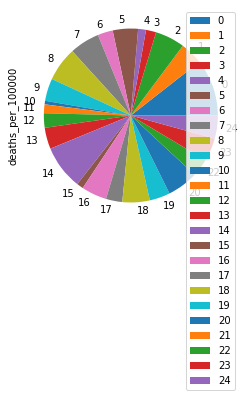

In [191]:
csv_shuffled["deaths_per_100000"] = csv_shuffled["deaths_per_100000"].astype(int)
csv_shuffled.plot(x ="county_name_long", y = "deaths_per_100000", kind= "pie")

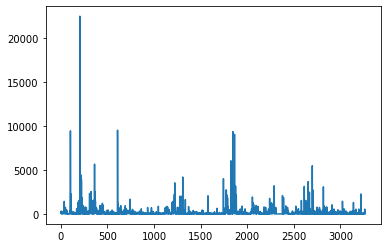

In [146]:
#*****************
csv["deaths"].plot() # single line graphs

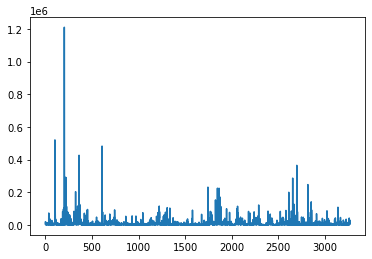

In [147]:
csv["confirmed"].plot() # single line graphs

In [ ]:
#### Making suffled
csv_shuffled = csv.sample(frac = .0076)


In [116]:
csv_shuffled.reset_index(inplace= True)
csv_shuffled

,level_0,index,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000,New_column,diff_between_case_and_death
0,0,530,2021-03-14 16:25:11 UTC,county,Georgia,Upson,"UPSON, GEORGIA, US",13293.0,32.879207,-84.300248,MICROPOLITAN,26216.0,3287,12538.14,120,457.74,NaN,3167.0
1,1,449,2021-03-14 16:25:11 UTC,county,Georgia,Gordon,"GORDON, GEORGIA, US",13129.0,34.504874,-84.872963,MICROPOLITAN,56790.0,7731,13613.31,104,183.13,NaN,7627.0
2,2,59,2021-03-14 16:25:11 UTC,county,Alabama,Sumter,"SUMTER, ALABAMA, US",1119.0,32.591174,-88.199162,NON-CORE,12985.0,1016,7824.41,31,238.74,NaN,985.0
3,3,1590,2021-03-14 16:25:11 UTC,county,Missouri,Wayne,"WAYNE, MISSOURI, US",29223.0,37.113039,-90.460014,NON-CORE,13308.0,1020,7664.56,11,82.66,NaN,1009.0
4,4,908,2021-03-14 16:25:11 UTC,county,Kansas,Douglas,"DOUGLAS, KANSAS, US",20045.0,38.885036,-95.292512,SMALL METRO,119319.0,8761,7342.50,76,63.69,NaN,8685.0
5,5,1133,2021-03-14 16:25:11 UTC,county,Louisiana,Iberia,"IBERIA, LOUISIANA, US",22045.0,29.868036,-91.758718,MEDIUM METRO,72691.0,6567,9034.13,148,203.60,NaN,6419.0
6,6,1984,2021-03-14 16:25:11 UTC,county,North Carolina,Yadkin,"YADKIN, NORTH CAROLINA, US",37197.0,36.162226,-80.662394,MEDIUM METRO,37665.0,3713,9857.96,46,122.13,NaN,3667.0
7,7,2837,2021-03-14 16:25:11 UTC,county,Texas,Washington,"WASHINGTON, TEXAS, US",48477.0,30.214985,-96.409462,MICROPOLITAN,34796.0,3739,10745.49,84,241.41,NaN,3655.0
8,8,2451,2021-03-14 16:25:11 UTC,county,South Dakota,Codington,"CODINGTON, SOUTH DAKOTA, US",46029.0,44.977881,-97.188277,MICROPOLITAN,27993.0,4079,14571.50,77,275.07,NaN,4002.0
9,9,49,2021-03-14 16:25:11 UTC,county,Alabama,Monroe,"MONROE, ALABAMA, US",1099.0,31.567294,-87.369950,NON-CORE,21512.0,1676,7791.00,39,181.29,NaN,1637.0


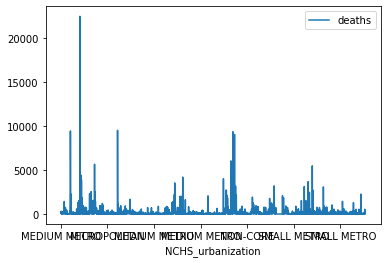

In [138]:
csv["deaths"] = csv["deaths"].astype(int)
csv.plot(x ="NCHS_urbanization", y = "deaths", kind= "line")

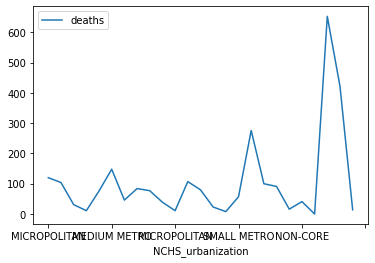

In [148]:
csv_shuffled.plot(x ="NCHS_urbanization", y = "deaths", kind= "line")